<a href="https://colab.research.google.com/github/shuishui658/quant-trading/blob/main/quant1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install akshare
import numpy as np
import pandas as pd
import akshare as ak
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei'] # 中文显示
plt.rcParams['axes.unicode_minus'] = False   # 负数显示
from datetime import datetime

# 数据集准备
## 爬取数据
df = ak.fund_etf_hist_em(symbol='518880', period='daily', start_date='20130801', end_date='20240523')
#这是用AkShare库从东方财富网爬取基金（ETF）历史行情数据,symbol='518880'表示具体的ETF代码，这里是华安黄金ETF,period='daily'按日度频率获取数据。
df

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2013-08-01,2.653,2.643,2.656,2.635,300064,7.932452e+07,0.79,-0.53,-0.014,0.36
1,2013-08-02,2.630,2.578,2.632,2.558,330219,8.577813e+07,2.80,-2.46,-0.065,0.40
2,2013-08-05,2.621,2.630,2.642,2.621,240120,6.316635e+07,0.81,2.02,0.052,0.29
3,2013-08-06,2.620,2.591,2.620,2.586,223361,5.808451e+07,1.29,-1.48,-0.039,0.27
4,2013-08-07,2.562,2.574,2.582,2.560,195019,5.005002e+07,0.85,-0.66,-0.017,0.23
...,...,...,...,...,...,...,...,...,...,...,...
2623,2024-05-17,5.406,5.416,5.418,5.397,2336818,1.263240e+09,0.39,-0.02,-0.001,2.80
2624,2024-05-20,5.519,5.550,5.586,5.519,4070430,2.258323e+09,1.24,2.47,0.134,4.87
2625,2024-05-21,5.549,5.481,5.549,5.471,3495102,1.922435e+09,1.41,-1.24,-0.069,4.18
2626,2024-05-22,5.500,5.492,5.514,5.480,1887946,1.037492e+09,0.62,0.20,0.011,2.26


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40644 (\N{CJK UNIFIED IDEOGRAPH-9EC4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  fig.canvas

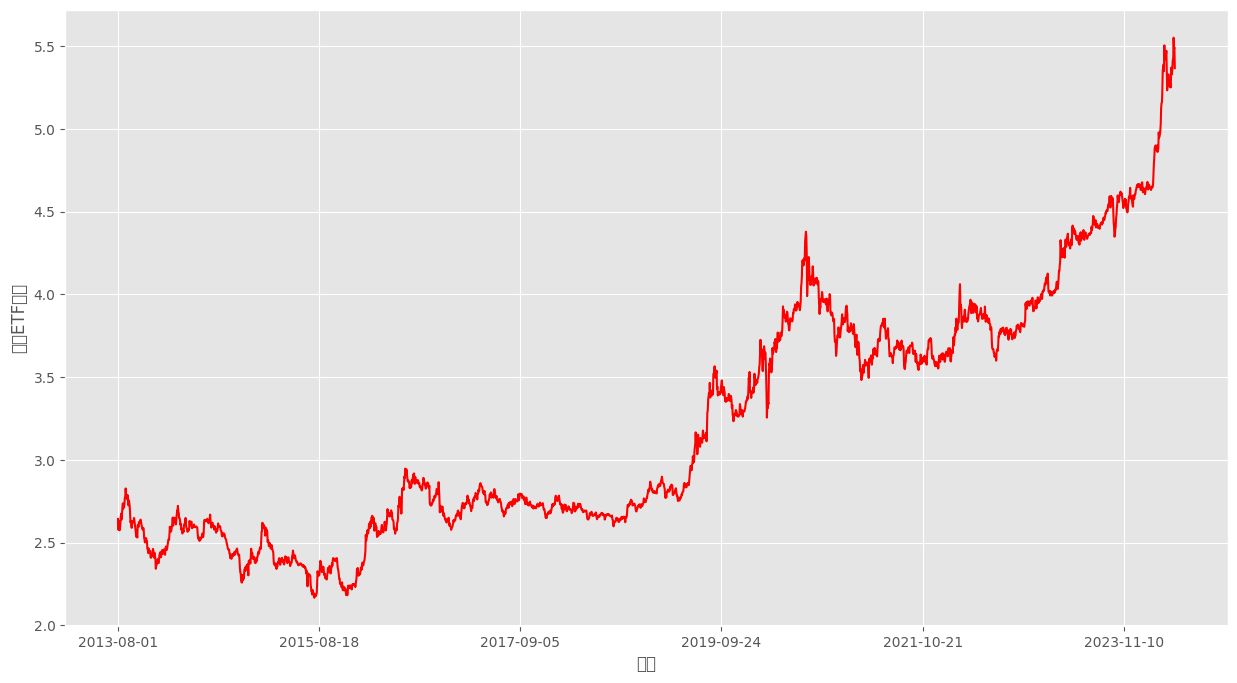

In [16]:
df = df.set_index("日期")
df = df[["收盘"]]
df.columns = ["close"]

df.close.plot(figsize=(15, 8), color='red')
plt.ylabel('黄金ETF价格')
# plt.title('黄金ETF价格序列')
plt.show()

In [18]:
## 因子构建
# 计算均线因子ma55,ma60
df['S1'] = df['close'].rolling(window=55).mean()
#在df中新增名为'S1'的一列，用来存储过去55天的收盘价的均值
df['S4'] = df['close'].rolling(window=60).mean()
# Df['S2'] = Df['close'].rolling(window=10).mean()
# Df['S3'] = Df['close'].rolling(window=20).mean()
df

,close,S1,S4
日期,,,
2013-08-01,2.643,NaN,NaN
2013-08-02,2.578,NaN,NaN
2013-08-05,2.630,NaN,NaN
2013-08-06,2.591,NaN,NaN
2013-08-07,2.574,NaN,NaN
...,...,...,...
2024-05-17,5.416,5.118000,5.078117
2024-05-20,5.550,5.134345,5.093217
2024-05-21,5.481,5.149527,5.107200


In [19]:
## 标签构建
df['next_day_close'] = df['close'].shift(-1)
#新增'next_day_close'这一列用来存储将'close'向上移动一行的数据：比如5.1这天，'next_day_close'就存储5.2的收盘价
df = df.dropna()
df

,close,S1,S4,next_day_close
日期,,,,
2013-11-01,2.602,2.662200,2.657283,2.584
2013-11-04,2.584,2.662164,2.656300,2.582
2013-11-05,2.582,2.661545,2.656367,2.578
2013-11-06,2.578,2.660073,2.655500,2.589
2013-11-07,2.589,2.658509,2.655467,2.573
...,...,...,...,...
2024-05-16,5.417,5.103709,5.065550,5.416
2024-05-17,5.416,5.118000,5.078117,5.550
2024-05-20,5.550,5.134345,5.093217,5.481


In [ ]:
## 拆分训练集和测试集
df.index = pd.to_datetime(df.index)
df_train = df[df.index < datetime.strptime("2024-01-01", "%Y-%m-%d")]
df_test = df[df.index >= datetime.strptime("2024-01-01", "%Y-%m-%d")]

features = ['S1', 'S4']

x_train = df_train[features]
y_train = df_train["next_day_close"]
x_test = df_test[features]
y_test = df_test["next_day_close"]